# Part 1: Reducing 30 features to 2 components 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(cancer['DESCR']) #30 numeric attributes 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# cancer['target']

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
scaled_data = sc.fit_transform(df)

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(569, 30)

In [17]:
x_pca.shape

(569, 2)

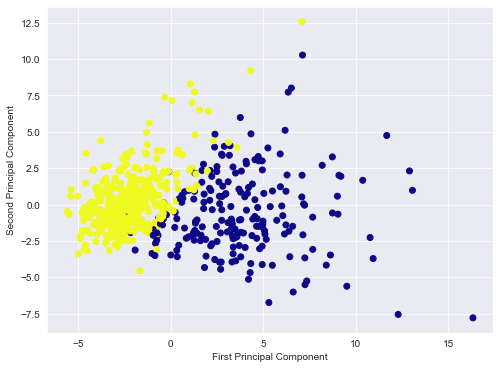

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [19]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [20]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [21]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


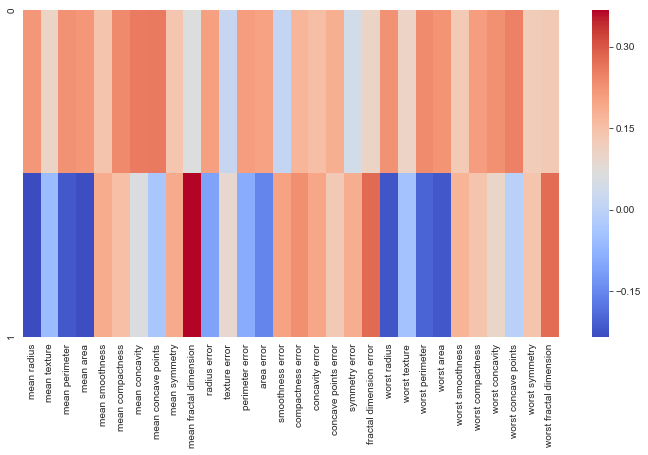

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='coolwarm')

**Conclusion of Part 1**

We can now use the new dataframe **(x_pca)** with reduced dimensions to train a ML algorithm. We have arbitrarily chosen 2 dimensions here for demonstration. However, we can later experiment with the number of components to bring in more granularity.

# Part 2: Choosing the best number of components

In the first part for ease of demonstration, we had arbitraily chosen 2 principal components. However, while using a real-world dataset we will need to evaluate the ideal number of components which can explain the highest variance of the original data. Let us try different dimensions and choose the best one in this section

In [70]:
#Since we have 30 features, let us see how we can create 30 components
pca_2 = PCA(n_components=30) 

In [71]:
x_pca_2 = pca_2.fit_transform(scaled_data)

In [72]:
x_pca_2.shape

(569, 30)

In [73]:
pca_2.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [111]:
variance=np.cumsum(np.round(pca_2.explained_variance_ratio_,decimals=3)*100)
print(variance)

[ 44.3  63.3  72.7  79.3  84.8  88.8  91.1  92.7  94.1  95.3  96.3  97.2
  98.   98.5  98.8  99.1  99.3  99.5  99.7  99.8  99.9 100.  100.1 100.2
 100.3 100.3 100.3 100.3 100.3 100.3]


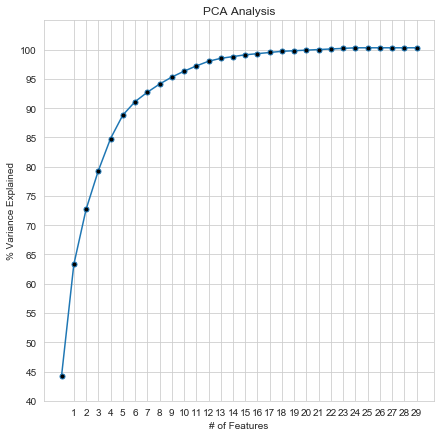

In [112]:
plt.figure(figsize=(7,7))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(1,30, 1.0))
plt.yticks(np.arange(40,105,5.0))
plt.ylim(40,105)
plt.plot(variance,marker='o',markersize=5,markerfacecolor='black')
plt.show()

In [115]:
#Creating a dictionary with number of components as key and variance stored as value
d = {}
for i in range(1,30):
    d[i] = variance[i]

In [118]:
d

{1: 63.3,
 2: 72.7,
 3: 79.3,
 4: 84.8,
 5: 88.8,
 6: 91.1,
 7: 92.69999999999999,
 8: 94.1,
 9: 95.3,
 10: 96.3,
 11: 97.2,
 12: 98.0,
 13: 98.5,
 14: 98.8,
 15: 99.1,
 16: 99.3,
 17: 99.5,
 18: 99.7,
 19: 99.8,
 20: 99.89999999999999,
 21: 99.99999999999999,
 22: 100.09999999999998,
 23: 100.19999999999997,
 24: 100.29999999999997,
 25: 100.29999999999997,
 26: 100.29999999999997,
 27: 100.29999999999997,
 28: 100.29999999999997,
 29: 100.29999999999997}

**Conclusion of Part 2**

If we employ 13 components we capture 98.5% of the variance within the dataset, thus we gain very little by implementing an additional component.This explains the diminishing marginal return on total variance explained. Hence, we can choose our **final pca array of X to contain 13 components**